In [1]:
# importamos las librerías necesarias para trabajar.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Otros 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_caba = pd.read_feather('./data/CovidCabaFeather')

In [3]:
preproc = 'raw'

n_clusters = 6

## Limpio columnas que no aportan al estudio

In [4]:
for columna in ['index', 
                'id_evento_caso', 
                'fecha_inicio_sintomas', 
                'fecha_apertura', 
                'fecha_internacion', 
                'fecha_cui_intensivo', 
                'fecha_fallecimiento',
                'carga_provincia_id',
                'fecha_diagnostico',
                'residencia_provincia_id',
                'residencia_departamento_id'
               ]: 
    df_caba.pop(columna)

## get Features

In [5]:
df_caba.loc[df_caba.edad_años_meses == 'Meses', 'edad'] = df_caba.edad / 12
for columna in ['edad_años_meses']: df_caba.pop(columna) 

df_caba = pd.concat([df_caba, pd.get_dummies(df_caba['sexo'])], axis=1)
df_caba.rename(columns = {'M':'Masculino', 'F':'Femenino'}, inplace = True)
for columna in ['sexo', 'NR']: df_caba.pop(columna)
    
df_caba = pd.concat([df_caba, pd.get_dummies(df_caba['residencia_pais_nombre'])], axis=1)
for columna in ['Bolivia', 'Paraguay', 'SIN ESPECIFICAR', 'Venezuela', 'residencia_pais_nombre']: df_caba.pop(columna) 
df_caba.rename(columns = {'Argentina':'residencia_Argentina'}, inplace = True)

df_caba = pd.concat([df_caba, pd.get_dummies(df_caba['carga_provincia_nombre'])], axis=1)
for columna in ['carga_provincia_nombre', 'residencia_provincia_nombre']: df_caba.pop(columna)
    
df_caba = pd.concat([df_caba, pd.get_dummies(df_caba['residencia_departamento_nombre'])], axis=1)
for columna in ['residencia_departamento_nombre', 'SIN ESPECIFICAR']: df_caba.pop(columna)

df_caba = pd.concat([df_caba, pd.get_dummies(df_caba['origen_financiamiento'])], axis=1)
for columna in ['origen_financiamiento']: df_caba.pop(columna)

df_caba = pd.concat([df_caba, pd.get_dummies(df_caba['clasificacion_resumen'])], axis=1)
for columna in ['clasificacion_resumen']: df_caba.pop(columna) 

df_caba = pd.concat([df_caba, pd.get_dummies(df_caba['clasificacion'])], axis=1)
for columna in ['clasificacion']: df_caba.pop(columna) 

## get Y

In [6]:
df_caba = pd.concat([df_caba, pd.get_dummies(df_caba['cuidado_intensivo'])], axis=1)
for columna in ['cuidado_intensivo', 'NO']: df_caba.pop(columna)
df_caba.rename(columns = {'SI':'cuidado_intensivo'}, inplace = True)

df_caba = pd.concat([df_caba, pd.get_dummies(df_caba['asistencia_respiratoria_mecanica'])], axis=1)
for columna in ['asistencia_respiratoria_mecanica', 'NO']: df_caba.pop(columna)
df_caba.rename(columns = {'SI':'asistencia_respiratoria_mecanica'}, inplace = True)

df_caba = pd.concat([df_caba, pd.get_dummies(df_caba['fallecido'])], axis=1)
for columna in ['fallecido', 'NO']: df_caba.pop(columna)
df_caba.rename(columns = {'SI':'fallecido'}, inplace = True)

## Drop NaNs

In [7]:
df_caba = df_caba.dropna(axis=0, how='any')

## dataset final

In [8]:
print(df_caba.shape)
for col in df_caba.keys():
    print('\n' + col + ' ' + str(type(df_caba[col][df_caba[col].first_valid_index()])) + '(' + str(len(df_caba[col].unique())) + ')[' + str(df_caba[col].isnull().sum()) + ' nulls]:')
    print(str(df_caba[col].unique()[0:20]))

(360877, 68)

edad <class 'numpy.float64'>(123)[0 nulls]:
[53. 69.  7. 46. 29. 61. 43. 38. 75. 55. 39. 48. 37. 50. 31. 47. 42. 35.
 54. 49.]

sepi_apertura <class 'numpy.int64'>(34)[0 nulls]:
[23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40  5  6]

Femenino <class 'numpy.uint8'>(2)[0 nulls]:
[0 1]

Masculino <class 'numpy.uint8'>(2)[0 nulls]:
[1 0]

residencia_Argentina <class 'numpy.uint8'>(2)[0 nulls]:
[1 0]

Buenos Aires <class 'numpy.uint8'>(2)[0 nulls]:
[1 0]

CABA <class 'numpy.uint8'>(2)[0 nulls]:
[0 1]

Catamarca <class 'numpy.uint8'>(2)[0 nulls]:
[0 1]

Chaco <class 'numpy.uint8'>(2)[0 nulls]:
[0 1]

Chubut <class 'numpy.uint8'>(2)[0 nulls]:
[0 1]

Corrientes <class 'numpy.uint8'>(2)[0 nulls]:
[0 1]

Córdoba <class 'numpy.uint8'>(2)[0 nulls]:
[0 1]

Entre Ríos <class 'numpy.uint8'>(2)[0 nulls]:
[0 1]

Formosa <class 'numpy.uint8'>(2)[0 nulls]:
[0 1]

Jujuy <class 'numpy.uint8'>(2)[0 nulls]:
[0 1]

La Pampa <class 'numpy.uint8'>(2)[0 nulls]:
[0 1]

La Rioja <class 'numpy.

## Preprocesing

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [10]:
X = df_caba[list(df_caba.columns[:-3])]
Y = df_caba[list(df_caba.columns[-3:])]

In [11]:
# Escalamos nuestros datos
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
scaler.fit(X)

X_std = scaler.transform(X)
scaler

StandardScaler()

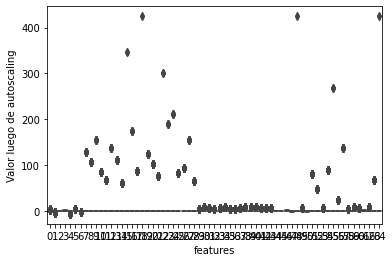

In [12]:
# visualizamos nuestros datos luego del autoscaling
sns.boxplot(data = pd.DataFrame(X_std))
plt.xlabel("features")
plt.ylabel("Valor luego de autoscaling")
plt.show()

In [13]:
import matplotlib.cm as cm

n_comps = X_std.shape[1] if preproc == 'raw' else preproc
decomp_pca = PCA(n_components= n_comps)
pca_data = decomp_pca.fit_transform(X_std)
xpca = pd.DataFrame(pca_data)
eigenvalues = decomp_pca.explained_variance_ratio_
percentage_var_explained = decomp_pca.explained_variance_ / np.sum(decomp_pca.explained_variance_);
cum_var_explained = np.cumsum(percentage_var_explained)

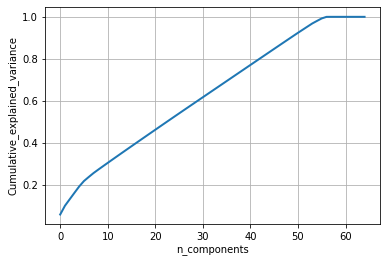

In [14]:
# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))
plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

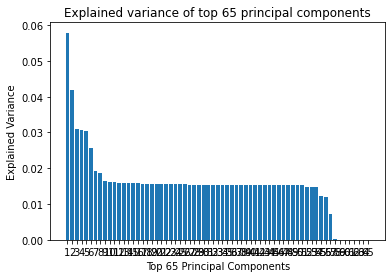

In [15]:
# visualizamos las primeras componentes principales del PCA
components = range(1,n_comps + 1)
plt.bar(components,eigenvalues)
plt.xticks(components)
plt.title('Explained variance of top ' + str(n_comps) + ' principal components')
plt.xlabel('Top ' + str(n_comps) + ' Principal Components')
plt.ylabel('Explained Variance')
plt.show()

No handles with labels found to put in legend.


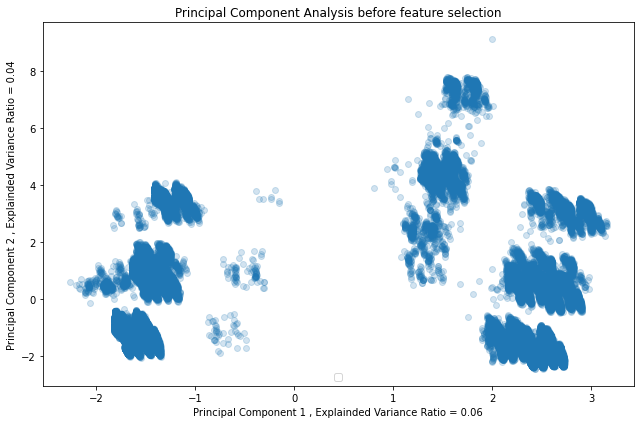

In [16]:
# scatter plot de los datos solamente con las 2 primeras componentes principales de los datos
plt.figure(figsize=(9,6))
plt.scatter(xpca.loc[:,0],xpca.loc[:,1], alpha = 0.2)    
plt.xlabel('Principal Component 1 , Explainded Variance Ratio = ' + str(np.round(eigenvalues[0],2)))
plt.ylabel('Principal Component 2 , Explainded Variance Ratio = ' + str(np.round(eigenvalues[1],2)))
plt.title('Principal Component Analysis before feature selection')
plt.legend(loc='lower center')
plt.tight_layout()
plt.show()

# Clustering

In [17]:
# Importamos librerias de Clustering
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

In [18]:
# Generamos un modelo de K means con clusters con los datos autoscalados
#n_clusters = 6
datos = X_std if preproc == 'raw' else xpca # X_std #xpca
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(datos)

In [19]:
# Contamos cuantas muestras quedaron en cada cluster
for label, counts in zip(list(np.unique(kmeans.labels_, return_counts=True)[0]), list(np.unique(kmeans.labels_, return_counts=True)[1])):
    print('Cluster ' + str(label) + ': ' + str(counts))

Cluster 0: 127017
Cluster 1: 119550
Cluster 2: 109990
Cluster 3: 2
Cluster 4: 4277
Cluster 5: 41


In [20]:
# realizamos el mismo PCA que antes aunque esta vez pintamos con colores cada cluster
n_comps = 2
kmeans_pca = PCA(n_components=n_comps)
kmeans_xpca = pd.DataFrame(kmeans_pca.fit_transform(X_std))
kmeans_eigenvalues = kmeans_pca.explained_variance_ratio_

No handles with labels found to put in legend.


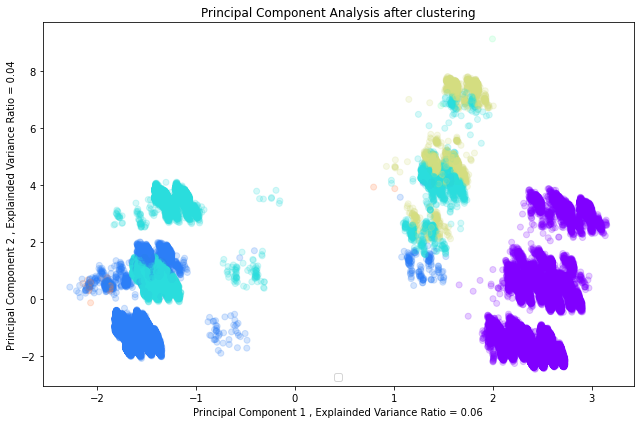

In [21]:
# plot PCA
y_pca = np.reshape(np.array(kmeans.labels_),(len(kmeans.labels_),1))
col = np.zeros((len(y_pca[:,0]),4))
col_float = 1.0 / n_clusters
for t in range(len(y_pca[:,0])):
    ray = y_pca[t,0] * col_float
    if y_pca[t,0]==0:
        col[t,] += np.reshape(cm.rainbow(np.linspace(ray, ray, 1)),(4,))
    elif y_pca[t,0]==1: 
        col[t,] += np.reshape(cm.rainbow(np.linspace(ray, ray, 1)),(4,))
    elif y_pca[t,0]==2:
        col[t,] += np.reshape(cm.rainbow(np.linspace(ray, ray, 1)),(4,))
    elif y_pca[t,0]==3:
        col[t,] += np.reshape(cm.rainbow(np.linspace(ray, ray, 1)),(4,))
    elif y_pca[t,0]==4:
        col[t,] += np.reshape(cm.rainbow(np.linspace(ray, ray, 1)),(4,))
    elif y_pca[t,0]==5:
        col[t,] += np.reshape(cm.rainbow(np.linspace(ray, ray, 1)),(4,))

plt.figure(figsize=(9,6))
plt.scatter(kmeans_xpca.loc[:,0],kmeans_xpca.loc[:,1], c=col, alpha = 0.2)    
plt.xlabel('Principal Component 1 , Explainded Variance Ratio = ' + str(np.round(kmeans_eigenvalues[0],2)))
plt.ylabel('Principal Component 2 , Explainded Variance Ratio = ' + str(np.round(kmeans_eigenvalues[1],2)))
plt.title('Principal Component Analysis after clustering')
plt.legend(loc='lower center')
plt.tight_layout()
plt.show()

## Evaluating obtained clusters

In [22]:
from sklearn.metrics import confusion_matrix

In [23]:
kmean_labels = pd.DataFrame(kmeans.labels_)
clusters_df = pd.get_dummies(kmean_labels[0])

In [28]:
ground_truth = 'cuidado_intensivo'
top_sens = 0
top_cluster = ''

for cluster in clusters_df.columns:
    y_true = Y[ground_truth]
    y_pred = clusters_df[cluster]
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    accuracy = (tn + tp) / (tn + fp + fn + tp)
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)

    print('Cluster Nº' + str(cluster) + ':')
    print('\tAccuracy:\t' + str(accuracy))
    print('\tSensitivity:\t' + str(sensitivity))
    print('\tSpecificity:\t' + str(specificity))
    print('\n')
    
    if sensitivity > top_sens:
        top_sens = sensitivity
        top_cluster = cluster
        
print('Highest rated cluster for ' + ground_truth + ': Cluster Nº' + str(top_cluster) + ' (' + str(top_sens) + ')')

Cluster Nº0:
	Accuracy:	0.6473812406997398
	Sensitivity:	0.47573817881478425
	Specificity:	0.6497160383558873


Cluster Nº1:
	Accuracy:	0.6590167841120381
	Sensitivity:	0.13834400165186866
	Specificity:	0.6660993051225444


Cluster Nº2:
	Accuracy:	0.6917259897416571
	Sensitivity:	0.37001858352260997
	Specificity:	0.6961020576686496


Cluster Nº3:
	Accuracy:	0.9865743729858095
	Sensitivity:	0.0
	Specificity:	0.9999943825589691


Cluster Nº4:
	Accuracy:	0.9751549696988171
	Sensitivity:	0.015899236010737148
	Specificity:	0.9882033738350832


Cluster Nº5:
	Accuracy:	0.9864663029231566
	Sensitivity:	0.0
	Specificity:	0.9998848424588663


Highest rated cluster for cuidado_intensivo: Cluster Nº0 (0.47573817881478425)


In [29]:
ground_truth = 'asistencia_respiratoria_mecanica'

for cluster in clusters_df.columns:
    y_true = Y[ground_truth]
    y_pred = clusters_df[cluster]
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    accuracy = (tn + tp) / (tn + fp + fn + tp)
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)

    print('Cluster Nº' + str(cluster) + ':')
    print('\tAccuracy:\t' + str(accuracy))
    print('\tSensitivity:\t' + str(sensitivity))
    print('\tSpecificity:\t' + str(specificity))
    print('\n')
    
    if sensitivity > top_sens:
        top_sens = sensitivity
        top_cluster = cluster
        
print('Highest rated cluster for ' + ground_truth + ': Cluster Nº' + str(top_cluster) + ' (' + str(top_sens) + ')')

Cluster Nº0:
	Accuracy:	0.6490022916395337
	Sensitivity:	0.5862068965517241
	Specificity:	0.6493575256307006


Cluster Nº1:
	Accuracy:	0.6650714786478495
	Sensitivity:	0.17536945812807883
	Specificity:	0.6678417264182228


Cluster Nº2:
	Accuracy:	0.6921167045835561
	Sensitivity:	0.2246305418719212
	Specificity:	0.6947612770902363


Cluster Nº3:
	Accuracy:	0.9943692726330579
	Sensitivity:	0.0
	Specificity:	0.9999944265940638


Cluster Nº4:
	Accuracy:	0.9826783086758092
	Sensitivity:	0.013793103448275862
	Specificity:	0.9881592990884694


Cluster Nº5:
	Accuracy:	0.9942612025704048
	Sensitivity:	0.0
	Specificity:	0.9998857451783072


Highest rated cluster for asistencia_respiratoria_mecanica: Cluster Nº0 (0.5862068965517241)


In [30]:
ground_truth = 'fallecido'

for cluster in clusters_df.columns:
    y_true = Y[ground_truth]
    y_pred = clusters_df[cluster]
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    accuracy = (tn + tp) / (tn + fp + fn + tp)
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)

    print('Cluster Nº' + str(cluster) + ':')
    print('\tAccuracy:\t' + str(accuracy))
    print('\tSensitivity:\t' + str(sensitivity))
    print('\tSpecificity:\t' + str(specificity))
    print('\n')
    
    if sensitivity > top_sens:
        top_sens = sensitivity
        top_cluster = cluster
        
print('Highest rated cluster for ' + ground_truth + ': Cluster Nº' + str(top_cluster) + ' (' + str(top_sens) + ')')

Cluster Nº0:
	Accuracy:	0.6562208176192996
	Sensitivity:	0.7759103641456583
	Specificity:	0.6544180106997598


Cluster Nº1:
	Accuracy:	0.6562125045375571
	Sensitivity:	0.0784313725490196
	Specificity:	0.6649152513768487


Cluster Nº2:
	Accuracy:	0.6843661413722681
	Sensitivity:	0.13445378151260504
	Specificity:	0.692649118760583


Cluster Nº3:
	Accuracy:	0.985155607035084
	Sensitivity:	0.0
	Specificity:	0.9999943744690906


Cluster Nº4:
	Accuracy:	0.9736419888216761
	Sensitivity:	0.011204481792717087
	Specificity:	0.9881385680773623


Cluster Nº5:
	Accuracy:	0.9850475369724311
	Sensitivity:	0.0
	Specificity:	0.9998846766163557


Highest rated cluster for fallecido: Cluster Nº0 (0.7759103641456583)
